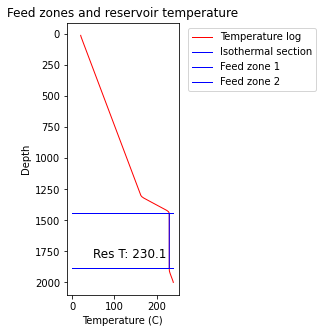

In [2]:

import numpy as np 
# to do some filters - scientific python - scipy
from scipy.ndimage.filters import gaussian_filter 

# How many samples per log?
n_x=200

# set some parameters that control what this basic synthetic temperature log
# looks like
# The temperature at the top and at the reservoir
startTemperature = 20   
maxTemperature = 240
isothermalSectionHeight = 0.30*n_x
startPerturbPoint = int(0.65*n_x)
endPerturbPoint = int(startPerturbPoint+isothermalSectionHeight)
# Gaussian filter length
MoveGaussian = np.arange(1, 20)

# Background gradient values
GeoGradLine = np.linspace(startTemperature, maxTemperature, num=n_x)

StartPerturbT = GeoGradLine[startPerturbPoint].copy() 
IsoT = GeoGradLine[endPerturbPoint].copy()

# Make isothermal section between the start and end perturbation point
GeoGradLine[startPerturbPoint:endPerturbPoint] = GeoGradLine[endPerturbPoint].copy()
# Create a graded section before the isothermal section
endPtIdx_1 = int(startPerturbPoint+0.2*(endPerturbPoint-startPerturbPoint))
m_slope_1 = (IsoT-StartPerturbT)/(endPtIdx_1-startPerturbPoint)
b_1 = IsoT - m_slope_1*endPtIdx_1
x = np.arange(startPerturbPoint,endPtIdx_1)
GeoGradLine[startPerturbPoint:endPtIdx_1] = m_slope_1*x+b_1             

# smooth out the temperature curve with a Gaussian filter
sigma = np.random.randint(1,3)
TemperatureCurve = gaussian_filter(GeoGradLine, sigma=sigma)

Feed1 = endPtIdx_1+MoveGaussian[sigma]
Feed2 = endPerturbPoint-MoveGaussian[sigma]
ReservoirTemp = GeoGradLine[endPerturbPoint].copy()

# one of the premier python plotting packages 
#(though seaborn is better for pandas datasets)
import matplotlib.pyplot as plt

# Create a depth column
Depth = np.arange(10, 2010, 10)

# create a figure object
fig, ax = plt.subplots(1, 1, figsize=(2,5))

ax.plot(TemperatureCurve, Depth, lw=1, alpha=1, color='r', label=r'Temperature log')
ax.plot(TemperatureCurve[Feed1:Feed2], Depth[Feed1:Feed2], lw=1, alpha=1, color='b', label=r'Isothermal section')
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Depth')
ax.set_title('Feed zones and reservoir temperature')

ax.plot([0, maxTemperature], [Feed1*10, Feed1*10], lw=1, alpha=1, color='b', label=r'Feed zone 1')
ax.plot([0, maxTemperature], [Feed2*10, Feed2*10], lw=1, alpha=1, color='b', label=r'Feed zone 2')
ax.text(50, Feed2*10-80, 'Res T: ' + '{:.1f}'.format(ReservoirTemp), fontsize=12)
ax.invert_yaxis()
l = plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

In [3]:
a = [1, 5, 3]
b= [-1, 1]
conv = np.convolve(a,b[::-1], mode='valid')
conv

array([ 4, -2])

In [4]:
# load some packages
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

In [5]:
# get an image from my github
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/ahinoamp/CNN_temp_log_tutorial/main/faults.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  338k  100  338k    0     0  1377k      0 --:--:-- --:--:-- --:--:-- 1377k


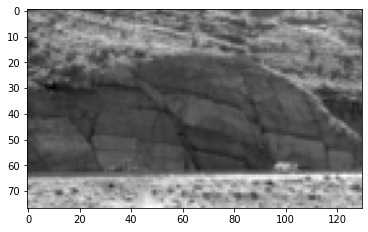

In [6]:
# get an image
faults = imread('faults.jpg')
faults = rescale(rgb2gray(faults), 0.10)
plt.imshow(faults, cmap='gray');

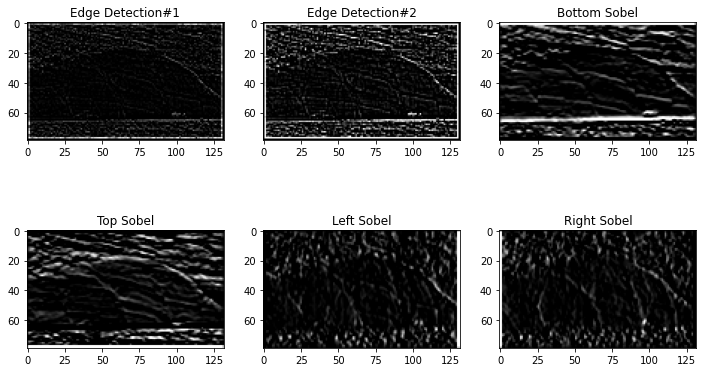

In [7]:
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
kernels = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6]
kernel_name = ['Edge Detection#1', 'Edge Detection#2', 
               'Bottom Sobel', 'Top Sobel', 
               'Left Sobel', 'Right Sobel']
figure, axis = plt.subplots(2,3, figsize=(12,7))
for kernel, name, ax in zip(kernels, kernel_name, axis.flatten()):
     conv_im1 = convolve2d(faults, 
                           kernel[::-1, ::-1]).clip(0,1)
     ax.imshow(abs(conv_im1), cmap='gray')
     ax.set_title(name)

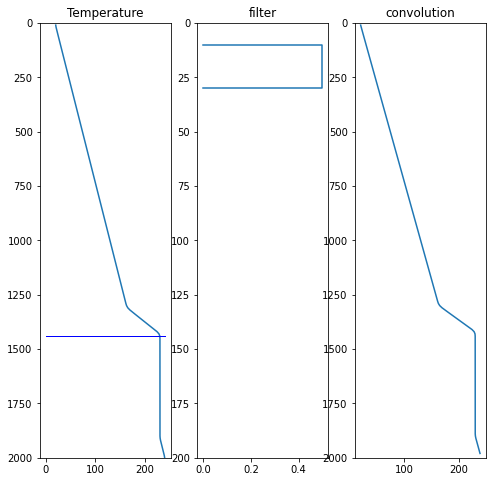

In [10]:
filter =  [0, 1, 0]


conv = np.convolve(TemperatureCurve, filter, mode='valid')

fig, axs = plt.subplots(1, 3, figsize=(8,8))

axs[0].plot(TemperatureCurve, np.linspace(10,2000, 200))
axs[0].set_title('Temperature')
axs[0].set_ylim([0, 2000])
axs[0].invert_yaxis()
axs[0].plot([0, maxTemperature], [Feed1*10, Feed1*10], lw=1, alpha=1, color='b', label=r'Feed zone 1')

axs[1].step(filter, np.linspace(10,2000, 200)[0:len(filter)],where='mid')
axs[1].set_title('filter')
axs[1].set_ylim([0, 200])
axs[1].invert_yaxis()

axs[2].plot(conv, np.linspace(10,2000, 200)[0:len(conv)])
axs[2].set_title('convolution')
axs[2].set_ylim([0, 2000])
axs[2].invert_yaxis()

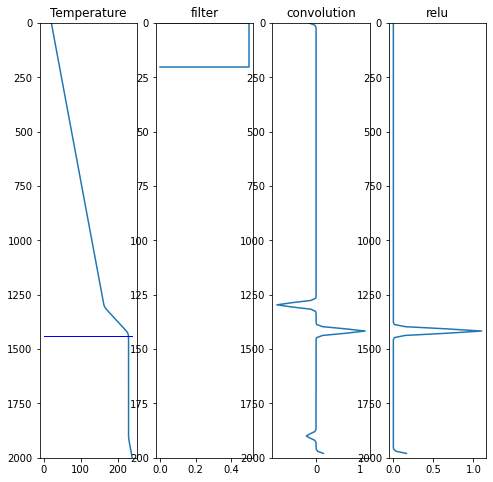

In [13]:
def relu(X):
   return np.maximum(0,X)


fig, axs = plt.subplots(1, 4, figsize=(8,8))

axs[0].plot(TemperatureCurve, np.linspace(0,2000, 200))
axs[0].set_title('Temperature')
axs[0].set_ylim([0, 2000])
axs[0].plot([0, maxTemperature], [Feed1*10, Feed1*10], lw=1, alpha=1, color='b', label=r'Feed zone 1')
axs[0].invert_yaxis()

axs[1].step(filter, np.linspace(0,2000, 200)[0:len(filter)], where='mid')
axs[1].set_title('filter')
axs[1].set_ylim([0, 200])
axs[1].invert_yaxis()

filter = [-0.5, 1, -0.5]
conv = np.convolve(TemperatureCurve, filter, mode='valid')
axs[2].plot(conv, np.linspace(0,2000, 200)[0:len(conv)])
axs[2].set_title('convolution')
axs[2].set_ylim([0, 2000])
axs[2].invert_yaxis()

axs[3].plot(relu(conv), np.linspace(0,2000, 200)[0:len(conv)])
axs[3].set_title('relu')
axs[3].set_ylim([0, 2000])
axs[3].invert_yaxis()

In [14]:
weights = np.zeros((198,))
weights

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

The sum of the weights*relu(conv(input)) is: 0.09460046107566168


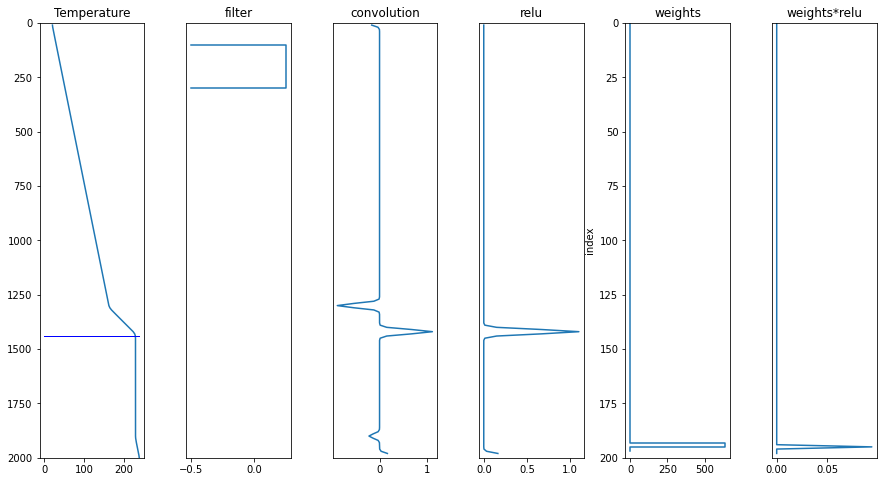

In [15]:
#################################
# Change the index of the weights
index_nonzero=194
#################################
weights = np.zeros((198,))
weights[index_nonzero] = 1410/np.max(relu(conv))

fig, axs = plt.subplots(1, 6, figsize=(15,8))
plt.subplots_adjust(wspace = 0.4)
plt.subplots_adjust(hspace = 0.4)

axs[0].plot(TemperatureCurve, np.linspace(10,2000, 200))
axs[0].set_title('Temperature')
axs[0].set_ylim([0, 2000])
axs[0].plot([0, maxTemperature], [Feed1*10, Feed1*10], lw=1, alpha=1, color='b', label=r'Feed zone 1')
axs[0].invert_yaxis()

axs[1].step(filter, np.linspace(10,2000, 200)[0:len(filter)], where='mid')
axs[1].set_title('filter')
axs[1].set_yticks([])
axs[1].set_ylim([0, 200])
axs[1].invert_yaxis()

axs[2].plot(conv, np.linspace(10,2000, 200)[0:len(conv)])
axs[2].set_title('convolution')
axs[2].set_ylim([0, 2000])
axs[2].set_yticks([])
axs[2].invert_yaxis()

axs[3].plot(relu(conv), np.linspace(10,2000, 200)[0:len(conv)])
axs[3].set_title('relu')
axs[3].set_ylim([0, 2000])
axs[3].set_yticks([])
axs[3].invert_yaxis()

axs[4].step(weights, np.arange(len(weights)), where='mid')
axs[4].set_ylabel('index')
axs[4].set_title('weights')
axs[4].set_ylim([0, 200])
axs[4].invert_yaxis()

axs[5].plot(weights*relu(conv), np.linspace(0,2000, 200)[0:len(conv)])
axs[5].set_title('weights*relu')
axs[5].set_ylim([0, 2000])
axs[5].set_yticks([])
axs[5].invert_yaxis()

# Trying to get to 1400
FullyConnectedSum1 = np.sum(weights*relu(conv))
print('The sum of the weights*relu(conv(input)) is: ' + str(FullyConnectedSum1))